In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import glob
import os
import pandas as pd
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

2025-06-15 21:30:00.239908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750023000.264039    1006 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750023000.271410    1006 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data_path = '/kaggle/input/plantdisease/PlantVillage'

In [3]:
categories = os.listdir(data_path)
print("Classes:", categories)

Classes: ['Pepper__bell___Bacterial_spot', 'Potato___healthy', 'Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Early_blight', 'Tomato__Target_Spot', 'Pepper__bell___healthy', 'Potato___Late_blight', 'Tomato_Late_blight', 'Potato___Early_blight', 'Tomato__Tomato_mosaic_virus']


In [4]:
data_dir = "/kaggle/input/plantdisease/PlantVillage"
img_size = 128

categories = os.listdir(data_dir)
print("Classes:", categories)

data = []
labels = []

for i, category in tqdm(enumerate(categories)):
    folder_path = os.path.join(data_dir, category)
    for img in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img)
            img_arr = cv2.imread(img_path)
            img_arr = cv2.resize(img_arr, (img_size, img_size))
            data.append(img_arr)
            labels.append(i)
        except Exception as e:
            pass  # Skip unreadable images

print("Total images:", len(data))

Classes: ['Pepper__bell___Bacterial_spot', 'Potato___healthy', 'Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Early_blight', 'Tomato__Target_Spot', 'Pepper__bell___healthy', 'Potato___Late_blight', 'Tomato_Late_blight', 'Potato___Early_blight', 'Tomato__Tomato_mosaic_virus']


15it [00:58,  3.92s/it]

Total images: 20638


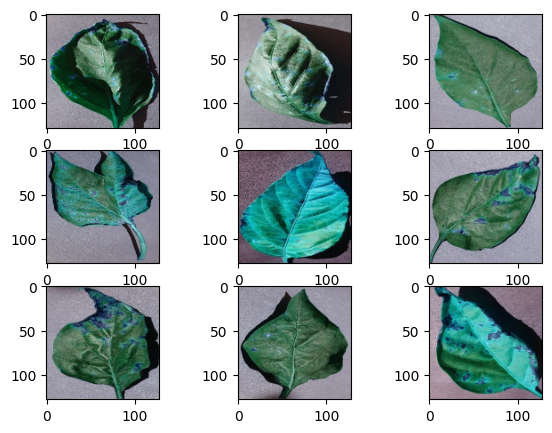

In [5]:
fig, axs = plt.subplots(3, 3, figsize = (7, 5))
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(data[cnt])
         cnt += 1

In [6]:
data = np.array(data) / 255.0 
labels = np.array(labels)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [8]:
y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

In [9]:
print(f"\nDataset shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Dataset shapes:
X_train: (16510, 128, 128, 3), y_train: (16510, 15)
X_test: (4128, 128, 128, 3), y_test: (4128, 15)


In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(15, activation= 'softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1750023068.214352    1006 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,699,919 (6.48 MB)

 Trainable params: 1,699,919 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10


I0000 00:00:1750023080.227890    1063 service.cc:148] XLA service 0x7ab6ac005410 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750023080.227932    1063 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750023080.436299    1063 cuda_dnn.cc:529] Loaded cuDNN version 90300


 16/516 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1126 - loss: 2.6993

I0000 00:00:1750023082.271321    1063 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


516/516 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.4239 - loss: 1.7711 - val_accuracy: 0.7878 - val_loss: 0.6484
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8178 - loss: 0.5606 - val_accuracy: 0.8292 - val_loss: 0.5030
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8768 - loss: 0.3678 - val_accuracy: 0.8588 - val_loss: 0.4201
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9134 - loss: 0.2547 - val_accuracy: 0.8876 - val_loss: 0.3509
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9377 - loss: 0.1873 - val_accuracy: 0.8864 - val_loss: 0.3581
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9611 - loss: 0.1152 - val_accuracy: 0.9082 - val_loss: 0.3127
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9719 - loss: 0.0865 - val_accuracy: 0.9065 - val_loss: 0.3227
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9771 - loss: 0.0704 - val_accuracy: 0.90

In [13]:
model.evaluate(X_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9116 - loss: 0.3540


[0.3647461533546448, 0.9108527302742004]

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


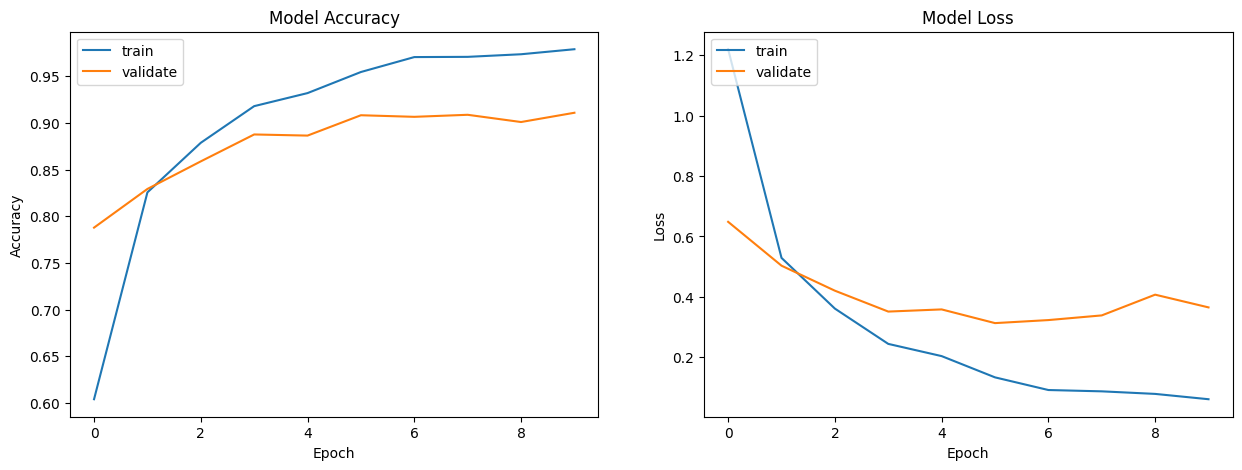

In [14]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# # list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [15]:
# Get predicted class probabilities
y_pred_probs = model.predict(X_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [16]:
# Convert probabilities to class labels (integers)
y_pred = np.argmax(y_pred_probs, axis=1)  # Predicted classes (0, 1, 2, ...)
y_true = np.argmax(y_test, axis=1)        # True classes (if y_test is one-hot encoded)

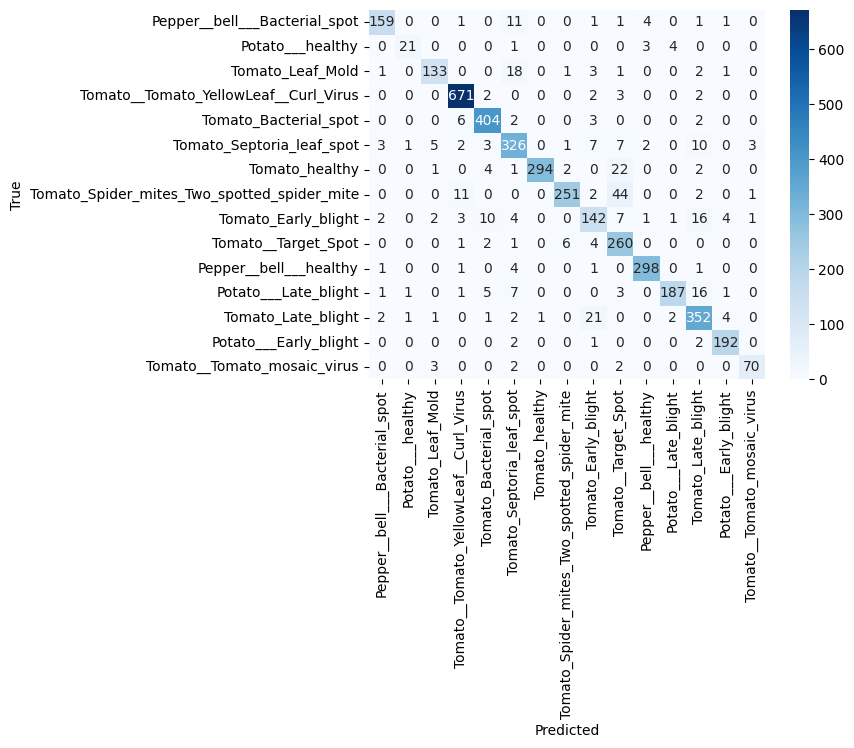

In [17]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()